In [1]:
from keras.models import Sequential

model = Sequential()

C:\Users\Rishabh Sharma\Anaconda3\envs\tensorflow_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Flatten, MaxPooling2D, Convolution2D

In [3]:

model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(output_dim=128,activation='relu'))
model.add(Dense(output_dim=1, activation='sigmoid'))

C:\Users\Rishabh Sharma\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rishabh Sharma\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\Rishabh Sharma\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  import sys


In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [7]:

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
            target_size=(64,64),
            batch_size=32,
            class_mode='binary')

Found 8000 images belonging to 2 classes.


In [10]:
test_set= test_datagen.flow_from_directory('dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=100,
        epochs=2,
        validation_data=test_set,
validation_steps=20)

Epoch 1/2
100/100 [==============================] - 55s 550ms/step - loss: 0.6282 - acc: 0.6581 - val_loss: 0.5955 - val_acc: 0.6750
Epoch 2/2
100/100 [==============================] - 48s 475ms/step - loss: 0.6083 - acc: 0.6775 - val_loss: 0.5662 - val_acc: 0.7172


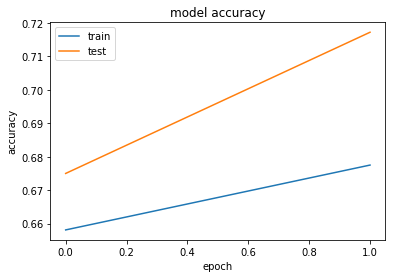

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# from IPython.display import Inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

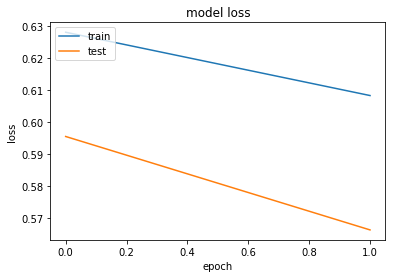

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
test_set

In [13]:
from sklearn.metrics import accuracy_score